<a href="https://colab.research.google.com/github/ajinkyajawale14/Heratech_Hackathon/blob/master/model2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hertech_hackthon
# Stateful LSTM to learn one-char to one-char mapping
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
from keras.preprocessing.sequence import pad_sequences
from theano.tensor.shared_randomstreams import RandomStreams
# fix random seed for reproducibility
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [0]:
 
def dataFrame(): 
  dataX = []
  dataY = []
  lastValue=0;
  for q in range(0,20,1):
    for a in range(0,23,1):
      for p in range(0,10,1):
        seq_in = [q,a,p,lastValue]
        seq_out = q*100+a*10+p
        lastValue=seq_out
        dataX.append( seq_in)
        dataY.append(seq_out)
        print(seq_in, '->',seq_out )
  return dataX,dataY
  
 

In [11]:

numpy.random.seed(7)

# prepare the dataset of input to output pairs encoded as integers
num_inputs = 1000
max_len = 5

dataX,dataY=dataFrame()
print(dataX)
# convert list of lists to array and pad sequences if needed
X = pad_sequences(dataX, maxlen=max_len, dtype='float32')
# reshape X to be [samples, time steps, features]
X = numpy.reshape(X, (X.shape[0], max_len, 1))
# normalize
X = X / float(len(dataX))
# one hot encode the output variable
y = np_utils.to_categorical(dataY)
# create and fit the model
batch_size = 1
model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], 1)))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=10, batch_size=batch_size, verbose=2)
# summarize performance of the model
scores = model.evaluate(X, y, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1]*100))
# demonstrate some model predictions
for i in range(20):
	pattern_index = numpy.random.randint(len(dataX))
	pattern = dataX[pattern_index]
	x = pad_sequences([pattern], maxlen=max_len, dtype='float32')
	x = numpy.reshape(x, (1, max_len, 1))
	x = x / float(len(dataX))
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result =  dataX[index]
	seq_in = [ dataX[value] for value in pattern]
	print(seq_in, "->", result)

[0, 0, 0, 0] -> 0
[0, 0, 1, 0] -> 1
[0, 0, 2, 1] -> 2
[0, 0, 3, 2] -> 3
[0, 0, 4, 3] -> 4
[0, 0, 5, 4] -> 5
[0, 0, 6, 5] -> 6
[0, 0, 7, 6] -> 7
[0, 0, 8, 7] -> 8
[0, 0, 9, 8] -> 9
[0, 1, 0, 9] -> 10
[0, 1, 1, 10] -> 11
[0, 1, 2, 11] -> 12
[0, 1, 3, 12] -> 13
[0, 1, 4, 13] -> 14
[0, 1, 5, 14] -> 15
[0, 1, 6, 15] -> 16
[0, 1, 7, 16] -> 17
[0, 1, 8, 17] -> 18
[0, 1, 9, 18] -> 19
[0, 2, 0, 19] -> 20
[0, 2, 1, 20] -> 21
[0, 2, 2, 21] -> 22
[0, 2, 3, 22] -> 23
[0, 2, 4, 23] -> 24
[0, 2, 5, 24] -> 25
[0, 2, 6, 25] -> 26
[0, 2, 7, 26] -> 27
[0, 2, 8, 27] -> 28
[0, 2, 9, 28] -> 29
[0, 3, 0, 29] -> 30
[0, 3, 1, 30] -> 31
[0, 3, 2, 31] -> 32
[0, 3, 3, 32] -> 33
[0, 3, 4, 33] -> 34
[0, 3, 5, 34] -> 35
[0, 3, 6, 35] -> 36
[0, 3, 7, 36] -> 37
[0, 3, 8, 37] -> 38
[0, 3, 9, 38] -> 39
[0, 4, 0, 39] -> 40
[0, 4, 1, 40] -> 41
[0, 4, 2, 41] -> 42
[0, 4, 3, 42] -> 43
[0, 4, 4, 43] -> 44
[0, 4, 5, 44] -> 45
[0, 4, 6, 45] -> 46
[0, 4, 7, 46] -> 47
[0, 4, 8, 47] -> 48
[0, 4, 9, 48] -> 49
[0, 5, 0, 49] -> 50
[

In [0]:
# Compile neural network
model.compile(loss='categorical_crossentropy', # Cross-entropy
                optimizer='adam', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

In [16]:
# Train neural network
history = model.fit(X, # Features
                      y, # Target
                      epochs=10, # Number of epochs
                      verbose=2, # No output
                      batch_size=1, # Number of observations per batch
                      validation_data=(X, y)) # Data for evaluation

Train on 4600 samples, validate on 4600 samples
Epoch 1/10
 - 30s - loss: 7.9729 - acc: 0.0000e+00 - val_loss: 7.6379 - val_acc: 0.0011
Epoch 2/10
 - 27s - loss: 7.6674 - acc: 4.3478e-04 - val_loss: 7.5329 - val_acc: 0.0017
Epoch 3/10
 - 27s - loss: 7.5329 - acc: 8.6957e-04 - val_loss: 7.4107 - val_acc: 0.0015
Epoch 4/10
 - 27s - loss: 7.4589 - acc: 0.0000e+00 - val_loss: 7.3141 - val_acc: 0.0022
Epoch 5/10
 - 28s - loss: 7.4108 - acc: 6.5217e-04 - val_loss: 7.2711 - val_acc: 0.0020
Epoch 6/10
 - 28s - loss: 7.3749 - acc: 8.6957e-04 - val_loss: 7.2262 - val_acc: 0.0013
Epoch 7/10
 - 28s - loss: 7.3509 - acc: 4.3478e-04 - val_loss: 7.2003 - val_acc: 0.0030
Epoch 8/10
 - 27s - loss: 7.3283 - acc: 4.3478e-04 - val_loss: 7.1924 - val_acc: 0.0017
Epoch 9/10
 - 26s - loss: 7.3099 - acc: 2.1739e-04 - val_loss: 7.1637 - val_acc: 0.0028
Epoch 10/10
 - 27s - loss: 7.2889 - acc: 0.0011 - val_loss: 7.1538 - val_acc: 0.0013


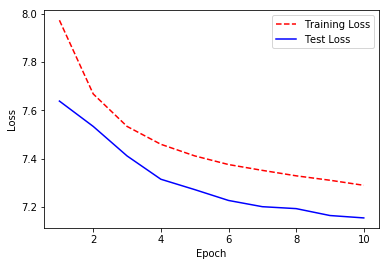

In [20]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()